In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
comps = pd.read_csv('meta_data/Competitions.csv')
tags = pd.read_csv('meta_data/CompetitionTags.csv')

In [3]:
comps.shape

(5576, 42)

In [4]:
comps.columns

Index(['Id', 'Slug', 'Title', 'Subtitle', 'HostSegmentTitle', 'ForumId',
       'OrganizationId', 'EnabledDate', 'DeadlineDate',
       'ProhibitNewEntrantsDeadlineDate', 'TeamMergerDeadlineDate',
       'TeamModelDeadlineDate', 'ModelSubmissionDeadlineDate',
       'FinalLeaderboardHasBeenVerified', 'HasKernels',
       'OnlyAllowKernelSubmissions', 'HasLeaderboard', 'LeaderboardPercentage',
       'LeaderboardDisplayFormat', 'EvaluationAlgorithmAbbreviation',
       'EvaluationAlgorithmName', 'EvaluationAlgorithmDescription',
       'EvaluationAlgorithmIsMax', 'MaxDailySubmissions',
       'NumScoredSubmissions', 'MaxTeamSize', 'BanTeamMergers',
       'EnableTeamModels', 'RewardType', 'RewardQuantity', 'NumPrizes',
       'UserRankMultiplier', 'CanQualifyTiers', 'TotalTeams',
       'TotalCompetitors', 'TotalSubmissions', 'ValidationSetName',
       'ValidationSetValue', 'EnableSubmissionModelHashes',
       'EnableSubmissionModelAttachments', 'HostName', 'CompetitionTypeId'],
     

In [5]:
comps.isna().sum()

Id                                     0
Slug                                   0
Title                                  0
Subtitle                               3
HostSegmentTitle                       0
ForumId                                0
OrganizationId                      5157
EnabledDate                            0
DeadlineDate                           0
ProhibitNewEntrantsDeadlineDate     5268
TeamMergerDeadlineDate              5274
TeamModelDeadlineDate               5338
ModelSubmissionDeadlineDate         5562
FinalLeaderboardHasBeenVerified        0
HasKernels                             0
OnlyAllowKernelSubmissions             0
HasLeaderboard                         0
LeaderboardPercentage                  0
LeaderboardDisplayFormat               0
EvaluationAlgorithmAbbreviation        1
EvaluationAlgorithmName                1
EvaluationAlgorithmDescription        17
EvaluationAlgorithmIsMax               1
MaxDailySubmissions                    0
NumScoredSubmiss

In [6]:
comps[comps.Title=='SIIM-FISABIO-RSNA COVID-19 Detection'] #Kaggle comp we are looking at, used to verify stuff.

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
4001,26680,siim-covid19-detection,SIIM-FISABIO-RSNA COVID-19 Detection,Identify and localize COVID-19 abnormalities o...,Featured,1366504,2734.0,05/18/2021 00:03:39,08/09/2021 23:59:00,08/02/2021 23:59:00,...,True,1305,1786,32307,NaN,NaN,False,False,NaN,1


In [7]:
100*((5103+473)-473)/(5103+473) # percent that have kernals -> are these the code competitions?? roughly lines up with our earlier estimate

91.51721664275466

In [8]:
j_df = pd.merge(comps, tags, left_on='Id', right_on='CompetitionId', how='inner', validate='m:m')
j_df.shape #There are a considerable number of untagged competitions...

(793, 45)

In [9]:
j_df[j_df.Title=='SIIM-FISABIO-RSNA COVID-19 Detection'] #Expect 2: image, multilabel classification
#There is a third tag online, but this seems to be a non-standard one, and doesn't appear.

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,Id_y,CompetitionId,TagId
595,26680,siim-covid19-detection,SIIM-FISABIO-RSNA COVID-19 Detection,Identify and localize COVID-19 abnormalities o...,Featured,1366504,2734.0,05/18/2021 00:03:39,08/09/2021 23:59:00,08/02/2021 23:59:00,...,32307,NaN,NaN,False,False,NaN,1,829,26680,14102
596,26680,siim-covid19-detection,SIIM-FISABIO-RSNA COVID-19 Detection,Identify and localize COVID-19 abnormalities o...,Featured,1366504,2734.0,05/18/2021 00:03:39,08/09/2021 23:59:00,08/02/2021 23:59:00,...,32307,NaN,NaN,False,False,NaN,1,830,26680,16636


In [10]:
j_df[j_df.Title=='RSNA 2022 Cervical Spine Fracture Detection'] #expect 3 tags: image, binary classification, computervision

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,Id_y,CompetitionId,TagId
720,36363,rsna-2022-cervical-spine-fracture-detection,RSNA 2022 Cervical Spine Fracture Detection,Identify cervical fractures from scans,Featured,2147844,1817.0,07/28/2022 17:49:51,10/27/2022 23:59:00,10/20/2022 23:59:00,...,12871,NaN,NaN,False,False,NaN,1,1023,36363,13207
721,36363,rsna-2022-cervical-spine-fracture-detection,RSNA 2022 Cervical Spine Fracture Detection,Identify cervical fractures from scans,Featured,2147844,1817.0,07/28/2022 17:49:51,10/27/2022 23:59:00,10/20/2022 23:59:00,...,12871,NaN,NaN,False,False,NaN,1,994,36363,14102
722,36363,rsna-2022-cervical-spine-fracture-detection,RSNA 2022 Cervical Spine Fracture Detection,Identify cervical fractures from scans,Featured,2147844,1817.0,07/28/2022 17:49:51,10/27/2022 23:59:00,10/20/2022 23:59:00,...,12871,NaN,NaN,False,False,NaN,1,995,36363,14201


In [11]:
j_df[j_df.Title=='Data Science Bowl 2017'] #image comp that is not a code comp. tags: image, binaryclassification, healthcare

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,Id_y,CompetitionId,TagId
186,6004,data-science-bowl-2017,Data Science Bowl 2017,Can you improve lung cancer detection?,Featured,2363,360.0,01/12/2017 14:00:00,04/12/2017 23:59:00,03/31/2017 23:59:00,...,1676,NaN,NaN,False,False,NaN,1,96,6004,4202
187,6004,data-science-bowl-2017,Data Science Bowl 2017,Can you improve lung cancer detection?,Featured,2363,360.0,01/12/2017 14:00:00,04/12/2017 23:59:00,03/31/2017 23:59:00,...,1676,NaN,NaN,False,False,NaN,1,94,6004,14102
188,6004,data-science-bowl-2017,Data Science Bowl 2017,Can you improve lung cancer detection?,Featured,2363,360.0,01/12/2017 14:00:00,04/12/2017 23:59:00,03/31/2017 23:59:00,...,1676,NaN,NaN,False,False,NaN,1,97,6004,14201


So tag 14102 is for image competitions as it is present in all of these cases

In [12]:
image = j_df[j_df.TagId==14102]
image.shape #108 image-tagged competitions

(108, 45)

In [13]:
image[image.OnlyAllowKernelSubmissions].DeadlineDate    ## Is a kernal only the same as a code competition? 
                                                        # Was this tag just not used before 2019.

337    04/10/2019 01:09:00
373    06/10/2019 22:09:06
378    07/08/2019 23:59:00
388    02/18/2021 23:59:00
393    10/24/2019 23:59:00
410    09/07/2019 23:59:00
416    03/16/2020 23:59:00
426    12/17/2019 23:59:00
444    05/11/2020 23:59:00
458    07/22/2020 23:59:00
471    09/29/2020 23:59:00
473    08/17/2020 23:59:00
488    08/19/2020 01:59:00
492    11/25/2020 23:59:00
500    10/06/2020 23:59:00
521    10/26/2020 23:59:00
534    05/10/2021 23:59:00
543    05/11/2021 23:59:00
546    03/16/2021 23:59:00
548    05/10/2021 23:59:00
561    01/14/2022 23:59:00
565    05/26/2021 23:59:00
574    05/26/2021 23:59:00
595    08/09/2021 23:59:00
605    07/14/2022 23:59:00
624    10/15/2021 23:59:00
629    10/01/2021 23:59:00
631    10/01/2021 23:59:00
639    12/30/2021 23:59:00
649    02/14/2022 23:59:00
698    09/22/2022 23:59:00
700    06/02/2022 23:59:00
701    05/30/2022 23:59:00
721    10/27/2022 23:59:00
723    10/10/2022 23:59:00
734    10/05/2022 23:59:00
Name: DeadlineDate, dtype: o

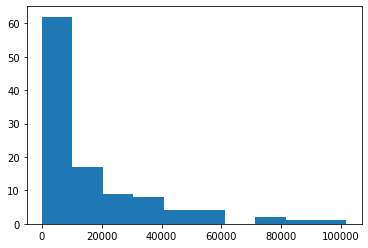

In [18]:
plt.hist(image.TotalSubmissions);

In [15]:
image.TotalSubmissions.describe()

count       108.000000
mean      15575.370370
std       19993.616981
min          27.000000
25%        1703.000000
50%        7184.000000
75%       21066.500000
max      101845.000000
Name: TotalSubmissions, dtype: float64

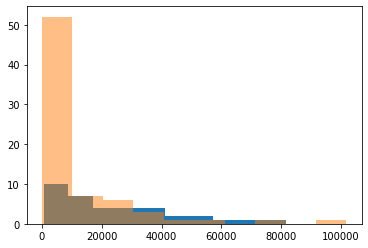

In [22]:
plt.hist(image[image.OnlyAllowKernelSubmissions].TotalSubmissions, bins=10)
plt.hist(image[image.OnlyAllowKernelSubmissions==False].TotalSubmissions, alpha=0.5, bins=10);

In [19]:
image[image.OnlyAllowKernelSubmissions].TotalSubmissions.describe()

count       36.000000
mean     24894.416667
std      20839.013687
min        767.000000
25%       8584.500000
50%      18920.500000
75%      39087.250000
max      81524.000000
Name: TotalSubmissions, dtype: float64

In [24]:
image[image.OnlyAllowKernelSubmissions==False].TotalSubmissions.describe()

count        72.000000
mean      10915.847222
std       17952.918924
min          27.000000
25%         753.250000
50%        4374.000000
75%       11217.250000
max      101845.000000
Name: TotalSubmissions, dtype: float64

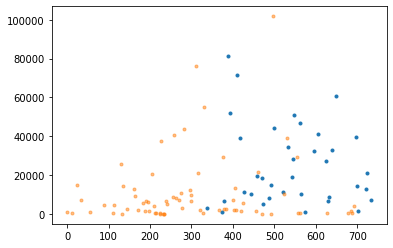

In [27]:
plt.plot(image[image.OnlyAllowKernelSubmissions].TotalSubmissions, '.')
plt.plot(image[image.OnlyAllowKernelSubmissions==False].TotalSubmissions,'.', alpha=0.5);

In [30]:
image[image.HostSegmentTitle== 'Featured']

,Id_x,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId,Id_y,CompetitionId,TagId
24,3978,datasciencebowl,National Data Science Bowl,"Predict ocean health, one plankton at a time",Featured,572,360.0,12/15/2014 14:00:00,03/16/2015 23:59:00,03/09/2015 23:59:00,...,15120,NaN,NaN,False,False,NaN,1,320,3978,14102
33,4104,diabetic-retinopathy-detection,Diabetic Retinopathy Detection,Identify signs of diabetic retinopathy in eye ...,Featured,623,NaN,02/17/2015 18:18:37,07/27/2015 23:59:00,07/20/2015 23:59:00,...,6993,NaN,NaN,False,False,NaN,1,270,4104,14102
111,4729,second-annual-data-science-bowl,Second Annual Data Science Bowl,Transforming How We Diagnose Heart Disease,Featured,970,360.0,12/14/2015 14:00:22,03/14/2016 23:59:00,02/29/2016 23:59:00,...,619,NaN,NaN,False,False,NaN,1,203,4729,14102
129,5048,state-farm-distracted-driver-detection,State Farm Distracted Driver Detection,Can computer vision spot distracted drivers?,Featured,1174,NaN,04/05/2016 17:06:37,08/01/2016 23:59:00,07/25/2016 23:59:00,...,25571,NaN,NaN,False,False,NaN,1,165,5048,14102
135,5144,ultrasound-nerve-segmentation,Ultrasound Nerve Segmentation,Identify nerve structures in ultrasound images...,Featured,1287,NaN,05/19/2016 14:00:16,08/18/2016 23:59:00,08/11/2016 23:59:00,...,14316,NaN,NaN,False,False,NaN,1,160,5144,14102
144,5229,draper-satellite-image-chronology,Draper Satellite Image Chronology,Can you put order to space and time?,Featured,1249,NaN,04/29/2016 14:00:03,06/27/2016 23:59:00,06/20/2016 23:59:00,...,2676,NaN,NaN,False,False,NaN,1,176,5229,14102
171,5568,the-nature-conservancy-fisheries-monitoring,The Nature Conservancy Fisheries Monitoring,Can you detect and classify species of fish?,Featured,1936,210.0,11/14/2016 08:02:32,04/12/2017 23:59:00,04/05/2017 23:59:00,...,2059,NaN,NaN,False,False,NaN,1,98,5568,14102
183,5916,dstl-satellite-imagery-feature-detection,Dstl Satellite Imagery Feature Detection,Can you train an eye in the sky?,Featured,2199,322.0,12/15/2016 00:00:00,03/07/2017 23:59:00,02/28/2017 23:59:00,...,5542,NaN,NaN,False,False,NaN,1,108,5916,14102
187,6004,data-science-bowl-2017,Data Science Bowl 2017,Can you improve lung cancer detection?,Featured,2363,360.0,01/12/2017 14:00:00,04/12/2017 23:59:00,03/31/2017 23:59:00,...,1676,NaN,NaN,False,False,NaN,1,94,6004,14102
190,6049,youtube8m,Google Cloud & YouTube-8M Video Understanding ...,Can you produce the best video tag predictions?,Featured,2638,445.0,02/15/2017 18:14:46,06/02/2017 23:59:00,NaN,...,6911,NaN,NaN,False,False,NaN,1,89,6049,14102
